In [37]:
import matplotlib.pyplot as plt
import sep
from astropy.coordinates import Galactic, SkyCoord
from astropy.io import fits
from astropy.wcs import WCS

from jades_sky_fraction.download import get_pearls_image

In [72]:
# Increase DPI of matplotlib plots for better quality
plt.rcParams["figure.dpi"] = 300

In [15]:
path = get_pearls_image()
hdul = fits.open(path)
hdul.info()

Filename: /home/sam/astro/jades-sky-fraction/src/jades_sky_fraction/data/mosaic_nep_nircam_f277w_30mas_20221014_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      73   (7700, 14600)   float32   


In [ ]:
wcs = WCS(hdul[0].header)

Set DATE-AVG to '2022-09-04T19:28:28.041' from MJD-AVG.
Set DATE-END to '2022-09-14T12:26:58.795' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -22.091840 from OBSGEO-[XYZ].
Set OBSGEO-H to 1543654444.803 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [ ]:
# Keeping this as an example
sky_coord: SkyCoord = wcs.pixel_to_world(0, 0)
gal_coord: SkyCoord = sky_coord.transform_to(Galactic)

In [67]:
data = hdul[0].data
data = data.astype(data.dtype.newbyteorder("="))

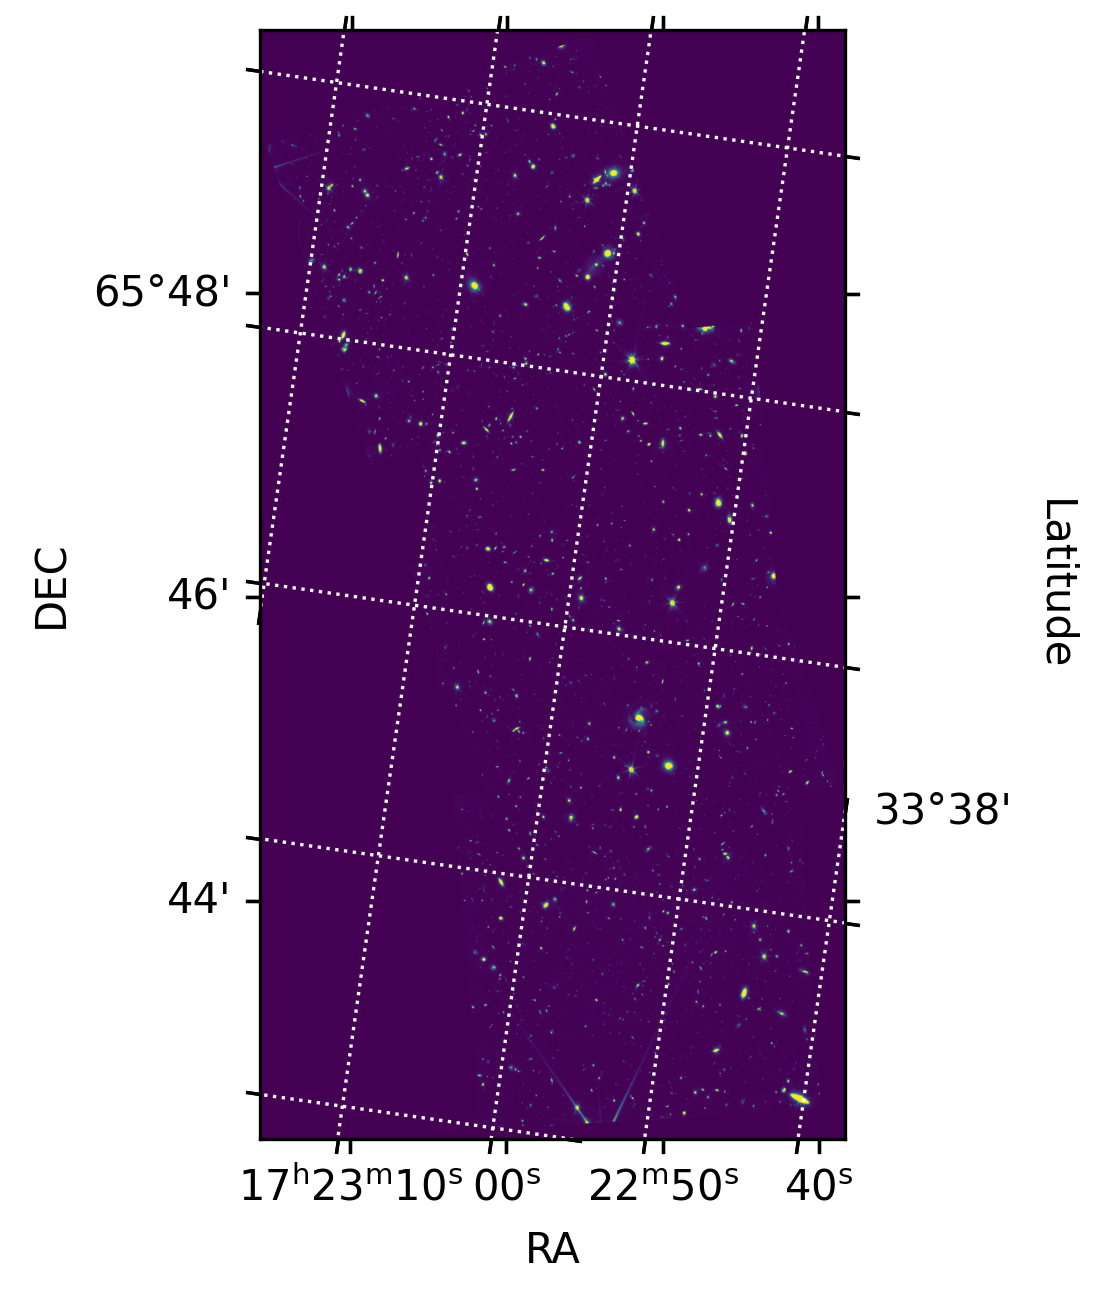

In [73]:
ax = plt.subplot(projection=wcs, label="overlays")
plt.imshow(data, origin="lower", vmin=0, vmax=0.3)
ax.coords[0].set_axislabel("RA")
ax.coords[1].set_axislabel("DEC")

overlay = ax.get_coords_overlay("galactic")
overlay.grid(color="white", ls="dotted")
overlay[0].set_axislabel("Longitude")
overlay[1].set_axislabel("Latitude")

In [69]:
# Following Sep tutorial
bkg = sep.Background(data, mask=data != 0)
bkg_image = bkg.back()
data_sub = data - bkg

In [70]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

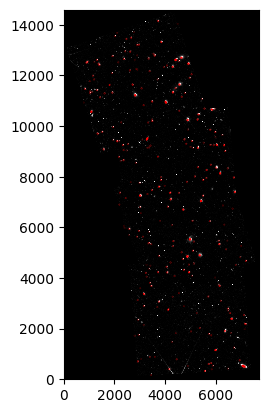

In [ ]:
import numpy as np
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation="nearest", cmap="gray", vmin=0, vmax=0.3, origin="lower")

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(
        xy=(objects["x"][i], objects["y"][i]),
        width=6 * objects["a"][i],
        height=6 * objects["b"][i],
        angle=objects["theta"][i] * 180.0 / np.pi,
    )
    e.set_facecolor("none")
    e.set_edgecolor("red")
    ax.add_artist(e)